## Step 1: Universal Library and Package declaration

In [ ]:
import warnings
warnings.filterwarnings("ignore") # used to supress display of warnings
import pandas as pd   # used for data manipulation and analysis
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt   #for data visualization
from matplotlib import pyplot
import seaborn as sns  ## Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
%matplotlib inline
from scipy.stats import norm
from sklearn.preprocessing import *
import scipy.stats as stats
import numpy as np

## Step 2: Import data to python

In [ ]:
df = pd.read_csv("property.csv")    #import data
df.head()

,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.000,0,263682f6-d0cd-4569-aeec-e727b76b7665,1.000,42,False,3.000,0.000,True,23.000
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.000,4320000,97c9535e-3985-47ce-a84c-a962c838a76b,2.000,116,True,NaN,1.000,True,16.000
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.000,1440000,b790f536-c274-4147-86e0-94d9b6d7352d,1.000,74,False,2.000,0.000,True,19.000
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.000,864000,93d06676-4975-4cc5-919b-3a0c29c7ad43,1.000,60,True,NaN,2.000,False,6.000
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.000,1296000,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,1.000,45,True,NaN,1.000,True,4.000


In [ ]:
print("The dataframe has {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataframe has 4930 rows and 11 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               4930 non-null   object 
 1   deposit               4925 non-null   float64
 2   monthly_rent          4930 non-null   int64  
 3   district_uuid         4929 non-null   object 
 4   room_qty              4927 non-null   float64
 5   unit_area             4930 non-null   int64  
 6   has_elevator          4913 non-null   object 
 7   building_floor_count  3282 non-null   float64
 8   unit_floor            4893 non-null   float64
 9   has_storage_area      4920 non-null   object 
 10  property_age          4926 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 423.8+ KB


There are 4930 samples and 11 columns.

deposit, monthly_rent, room_qty, unit_area, building_floor_count, unit_floor, property_age are numerical columns  

There are many missing values present in deposit, district_uuid, room_qty etc. 

## Step 3: Clean, prepare and validate data 

In [ ]:
missing = df.isnull().sum()   #finds total number of missing values in each column
missing = missing[missing>0]  #filter out the count of missing values>0 
print(missing)

deposit                    5
district_uuid              1
room_qty                   3
has_elevator              17
building_floor_count    1648
unit_floor                37
has_storage_area          10
property_age               4
dtype: int64


<AxesSubplot:title={'center':'Missing Vals'}>

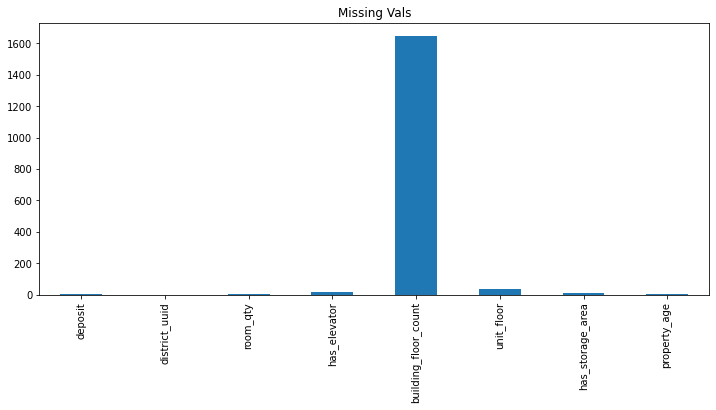

In [ ]:
#visualize missing data

plt.figure(figsize=(12, 5))
plt.title('Missing Vals')
missing.plot.bar()

In [ ]:
df.describe()

,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age
count,4925.000,4930.000,4927.000,4930.000,3282.000,4893.000,4926.000
mean,83212835.574,1052041.217,1.472,71.653,3.971,2.417,13.651
std,52899405.337,3797125.221,0.579,22.891,1.281,3.496,8.484
min,0.000,0.000,0.000,0.000,0.000,-2.000,0.000
25%,43200000.000,0.000,1.000,55.000,3.000,1.000,8.000
50%,72000000.000,720000.000,1.000,67.000,4.000,2.000,14.000
75%,108000000.000,1440000.000,2.000,84.000,4.000,3.000,18.000
max,432000000.000,144000000.000,5.000,263.000,16.000,225.000,99.000


The min value of unit floor is -2. We can assume that these negative value properties are in the basement

The min value of unit_area is 0. These data points should be treated as noisy data

For some properties, monthly rent is 0. These values needs to be checked.

In [ ]:
#check if any duplicate item_id is present or not. 
item_id= df['item_id'].value_counts()
item_id = item_id[item_id>1]  #filter out any duplicate values
print(item_id)

Series([], Name: item_id, dtype: int64)


There is no duplicate data present

In [ ]:
#Analysis of each column with the help of plots

Text(0.5, 1.0, 'Box Plot')

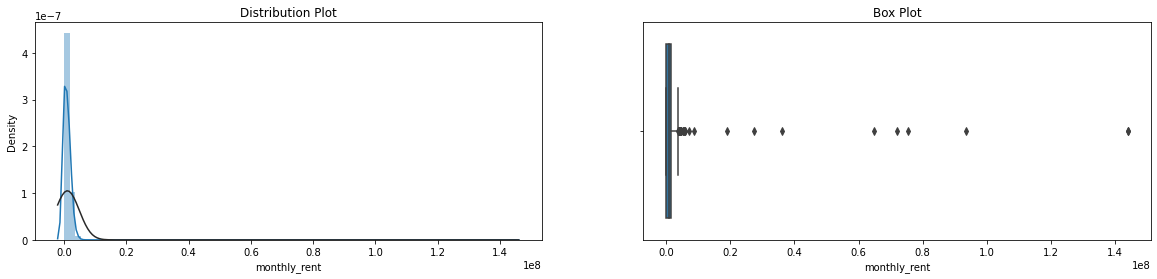

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['monthly_rent'],ax=ax1, bins=80, hist=True,fit=norm)
ax1.set_title("Distribution Plot")

sns.boxplot(df['monthly_rent'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in monthly_rent column and there is right skewness because long tail is at the right side

Text(0.5, 1.0, 'Box Plot')

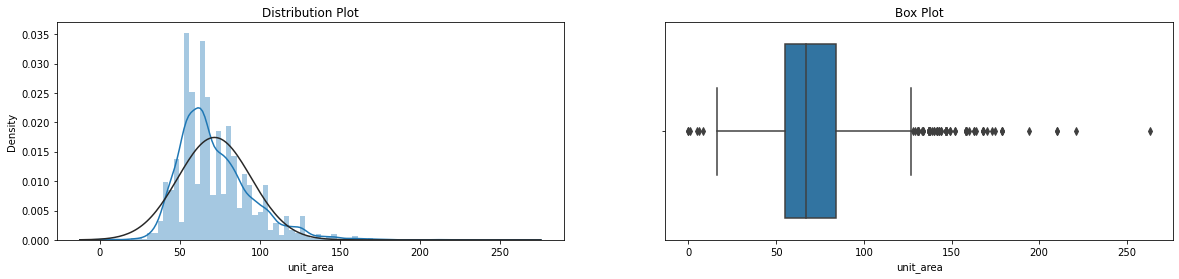

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['unit_area'],ax=ax1, bins=80, hist=True,fit=norm)
ax1.set_title("Distribution Plot")
sns.boxplot(df['unit_area'],ax=ax2)
ax2.set_title("Box Plot")

From above we can see that there are outliers in unit_area column and there is right skewness because long tail is at the right side

Text(0.5, 1.0, 'Box Plot')

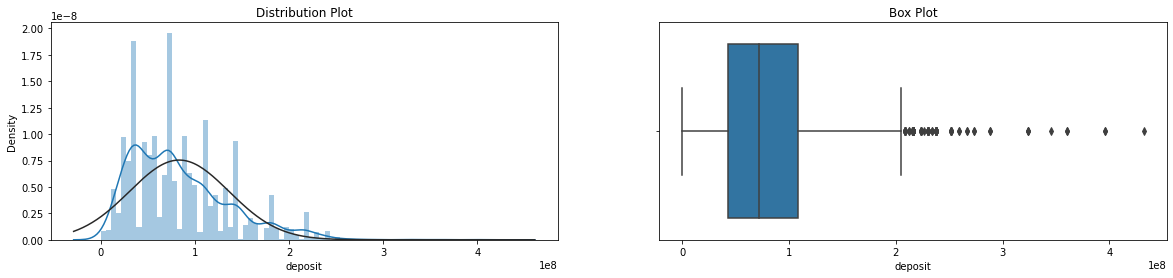

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['deposit'],ax=ax1, bins=80, hist=True,fit=norm)
ax1.set_title("Distribution Plot")

sns.boxplot(df['deposit'],ax=ax2)
ax2.set_title("Box Plot")


From above we can see that there are outliers in deposit column and there is right skewness because long tail is at the right side

Text(0.5, 1.0, 'Box Plot')

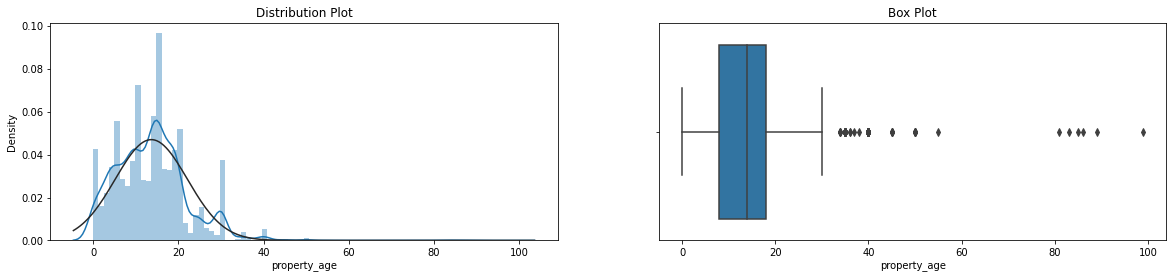

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(df['property_age'],ax=ax1, bins=80, hist=True,fit=norm)
ax1.set_title("Distribution Plot")

sns.boxplot(df['property_age'],ax=ax2)
ax2.set_title("Box Plot")


From above we can see that there are outliers in property_age column and there is right skewness because long tail is at the right side

In [ ]:
#there are few properties with unit area less than 20. We can drop those rows. 
df.drop(list(df[df.unit_area <20].index), inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
#there are few properties withage greater than 50 years. We can drop those rows. 
df.drop(list(df[df.property_age >55].index), inplace=True)
df.reset_index(drop=True, inplace=True)
print("Dataset Shape:", df.shape)

Dataset Shape: (4917, 11)


In [ ]:
#replace missing vaues with mean
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4917 entries, 0 to 4916
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               4917 non-null   object 
 1   deposit               4917 non-null   float64
 2   monthly_rent          4917 non-null   int64  
 3   district_uuid         4916 non-null   object 
 4   room_qty              4917 non-null   float64
 5   unit_area             4917 non-null   int64  
 6   has_elevator          4917 non-null   object 
 7   building_floor_count  4917 non-null   float64
 8   unit_floor            4917 non-null   float64
 9   has_storage_area      4917 non-null   object 
 10  property_age          4917 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 422.7+ KB


All the missing values have been replace with mean now. 

Only one missing value exists in district_uuid. This row can be deleted/ignored.

In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4916 entries, 0 to 4916
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               4916 non-null   object 
 1   deposit               4916 non-null   float64
 2   monthly_rent          4916 non-null   int64  
 3   district_uuid         4916 non-null   object 
 4   room_qty              4916 non-null   float64
 5   unit_area             4916 non-null   int64  
 6   has_elevator          4916 non-null   object 
 7   building_floor_count  4916 non-null   float64
 8   unit_floor            4916 non-null   float64
 9   has_storage_area      4916 non-null   object 
 10  property_age          4916 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 460.9+ KB


No missing values now. 

In [ ]:
df.head()

,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.000,0,263682f6-d0cd-4569-aeec-e727b76b7665,1.000,42,False,3.000,0.000,True,23.000
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.000,4320000,97c9535e-3985-47ce-a84c-a962c838a76b,2.000,116,True,3.969,1.000,True,16.000
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.000,1440000,b790f536-c274-4147-86e0-94d9b6d7352d,1.000,74,False,2.000,0.000,True,19.000
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.000,864000,93d06676-4975-4cc5-919b-3a0c29c7ad43,1.000,60,True,3.969,2.000,False,6.000
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.000,1296000,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,1.000,45,True,3.969,1.000,True,4.000


<AxesSubplot:>

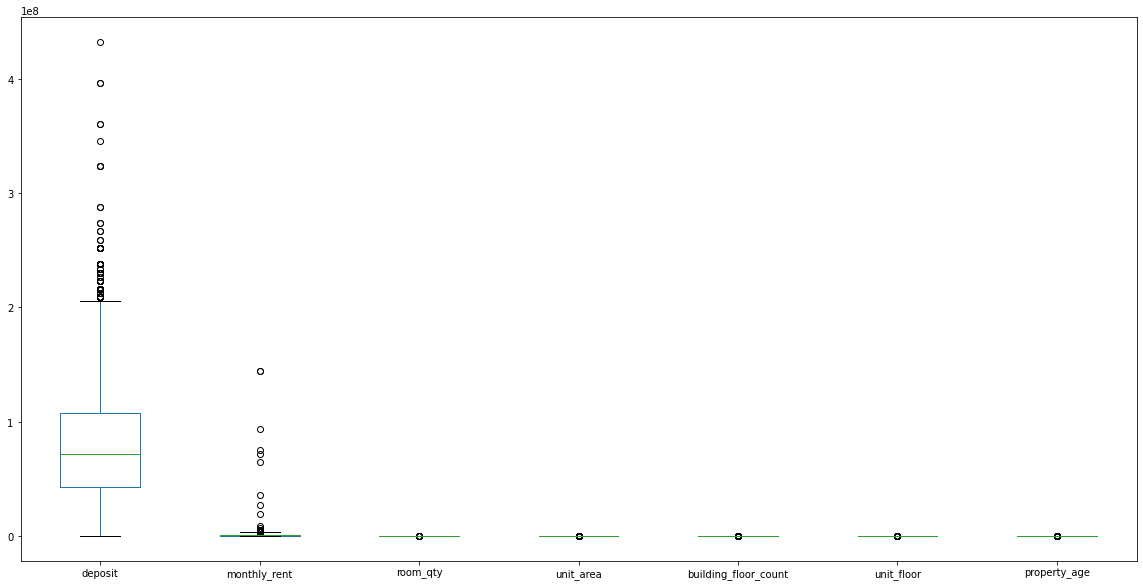

In [ ]:
#Boxplot to understand spread and outliers 
df.plot(kind='box', figsize=(20,10))

In [ ]:
#check how many outliers are there in monthly_rent column
q1 = np.quantile(df['monthly_rent'],0.25)
q2 = np.quantile(df['monthly_rent'],0.50)
q3 = np.quantile(df['monthly_rent'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("monthly_rent above",df['monthly_rent'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in monthly_rent column are",df[df['monthly_rent']>276]['monthly_rent'].shape[0])

Quartie1:: 0.0
Quartie2:: 720000.0
Quartie3:: 1440000.0
monthly_rent above 3600000.0 are outliers
The Outliers in monthly_rent column are 3074


In [ ]:
#check how many outliers are there in unit_area column
q1 = np.quantile(df['unit_area'],0.25)
q2 = np.quantile(df['unit_area'],0.50)
q3 = np.quantile(df['unit_area'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("unit_area above",df['unit_area'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in unit_area column are",df[df['unit_area']>276]['unit_area'].shape[0])

Quartie1:: 55.0
Quartie2:: 67.0
Quartie3:: 84.0
unit_area above 127.5 are outliers
The Outliers in unit_area column are 0


In [ ]:
#check how many outliers are there in deposit column
q1 = np.quantile(df['deposit'],0.25)
q2 = np.quantile(df['deposit'],0.50)
q3 = np.quantile(df['deposit'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("deposit above",df['deposit'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in deposit column are",df[df['deposit']>276]['deposit'].shape[0])

Quartie1:: 43200000.0
Quartie2:: 72000000.0
Quartie3:: 108000000.0
deposit above 205200000.0 are outliers
The Outliers in deposit column are 4911


In [ ]:
#check how many outliers are there in property_age column
q1 = np.quantile(df['property_age'],0.25)
q2 = np.quantile(df['property_age'],0.50)
q3 = np.quantile(df['property_age'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("property_age above",df['property_age'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in property_age column are",df[df['property_age']>276]['property_age'].shape[0])

Quartie1:: 8.0
Quartie2:: 14.0
Quartie3:: 18.0
property_age above 33.0 are outliers
The Outliers in property_age column are 0


Inferences based on outlier detection:
    
1. All properties with monthly rents greater than 3600000 are considered outliers in this analysis.
But, it is possible that there could be some properties with very high monthly rent.
2. This analysis treats all those properties whose deposit amount is greater than 205200000 as outliers. 
But, it is possible that there could be some properties with very high deposit amount. 
3. This analysis treats all those properties whose unit area is greater than 127.5 as outliers. 
But, it is possible that there could be some properties with big area. 
We have treated all these outliers by replacing them with their median value. But, a thorough analysis is also required without treating these outliers. 

In [ ]:
#Replacing all the outliers by median
numerics = ['int64', 'float64']
dataset = df.select_dtypes(include=numerics)
for col_name in dataset.columns[:-1]:
    q1 = dataset[col_name].quantile(0.25)
    q3 = dataset[col_name].quantile(0.75)
    iqr = q3 - q1 
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    dataset.loc[(dataset[col_name] < low) | (dataset[col_name] > high), col_name] = dataset[col_name].median()
df_str = df.select_dtypes(include='object')
df = pd.concat([df_str, dataset], axis=1, join='inner')

<AxesSubplot:>

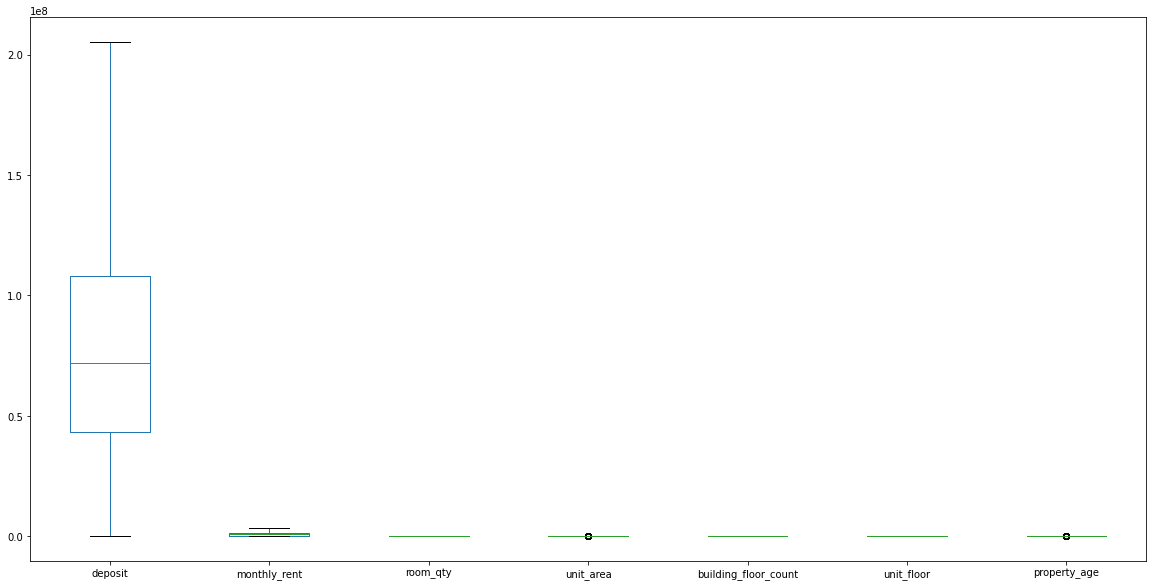

In [ ]:
df.plot(kind='box', figsize=(20,10))

All the outliers have been handled now.

## Step 4: Inferential Statistics

In [ ]:
'''Paired T-test..
we compare the mean of room_qty and unit_area to see if they are statistically significantly different from each other or not.
Here our null hypothesis is that both room_qty and unit_area are significantly similar.'''
room_qty = df['room_qty']
unit_area = df['unit_area']
stats.ttest_rel(a = room_qty, b= unit_area)

Ttest_relResult(statistic=-247.99999626231147, pvalue=0.0)

P value 0.000 means the null hypothesis is true. It means the null hypothesis is rejected i.e. room_qty and unit_area are significantly different from each other.

Chi-Square is used to test the level of association between two categorical variables.
Here, As a part of future analysis, Chi-Square test can be additionaly used to check the assosication between has_storage_area and has_elevator columns. 

## Step 5: Exploratory Data Analysis

### 5.1 Univariate Analysis

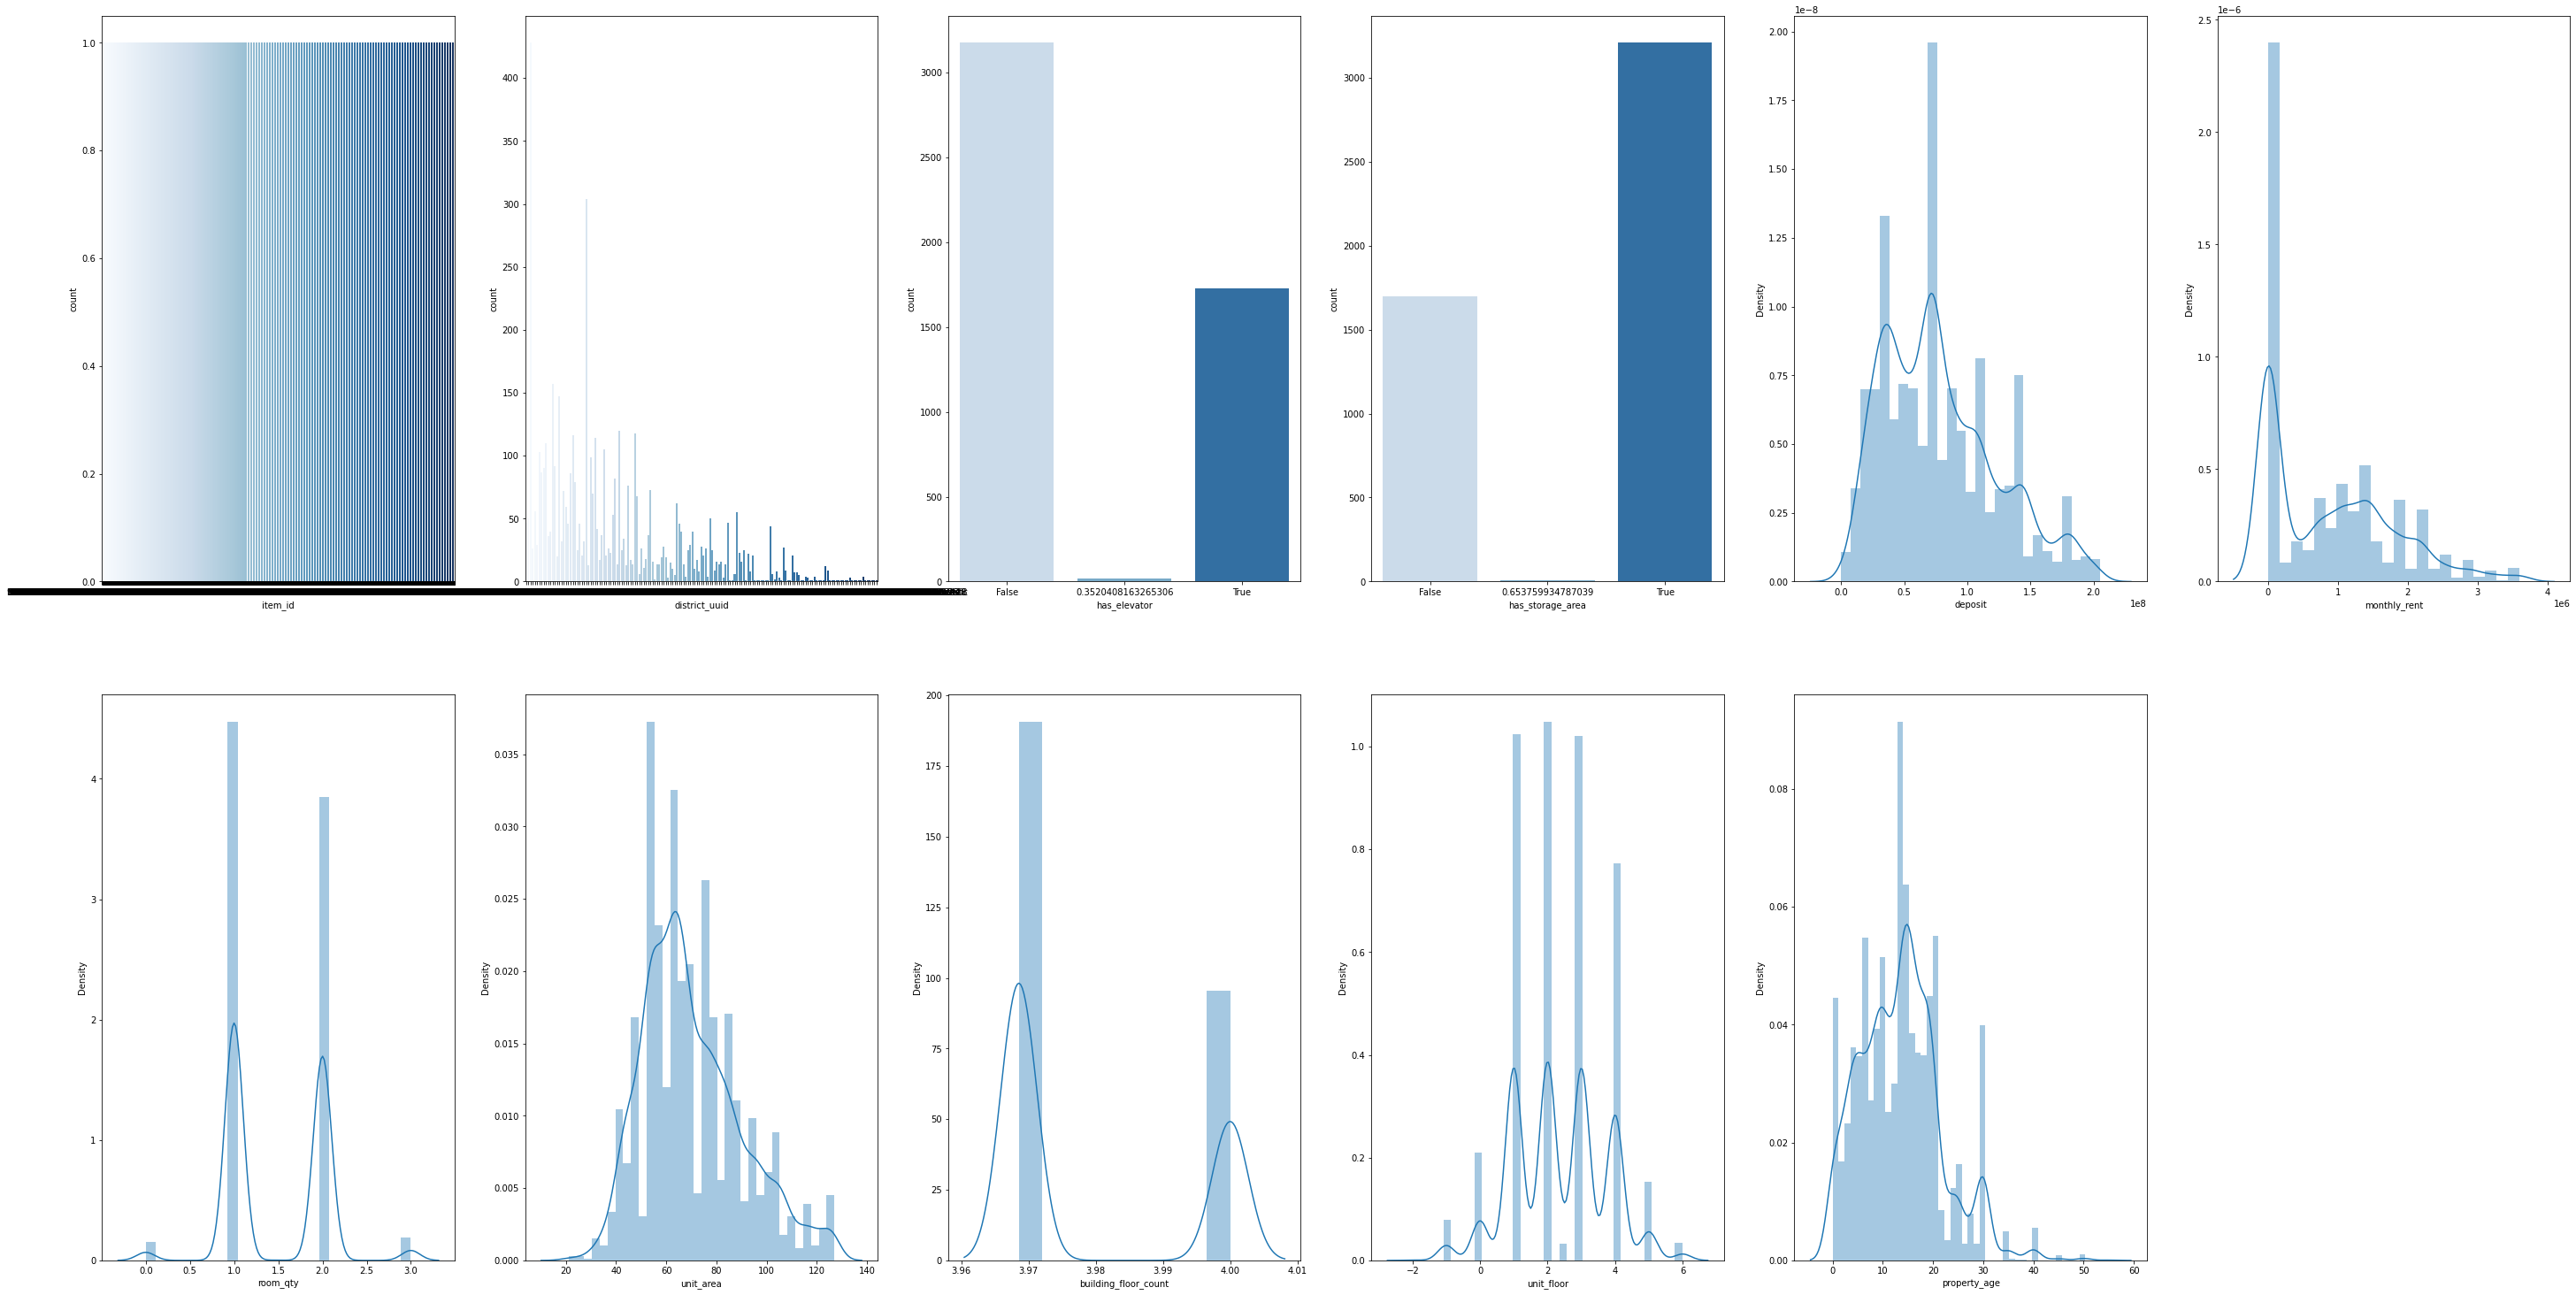

In [ ]:
plt.figure(figsize= (50,40))
pos = 1
for feature in df.columns:
    plt.subplot(3, 6, pos)
    if df[feature].dtype == 'object':
        sns.countplot(df[feature], palette= 'Blues')
    else:
        sns.distplot(df[feature], kde= True ) 
    pos += 1

### 5.2 Bivariate Analysis

<Figure size 1008x1008 with 0 Axes>

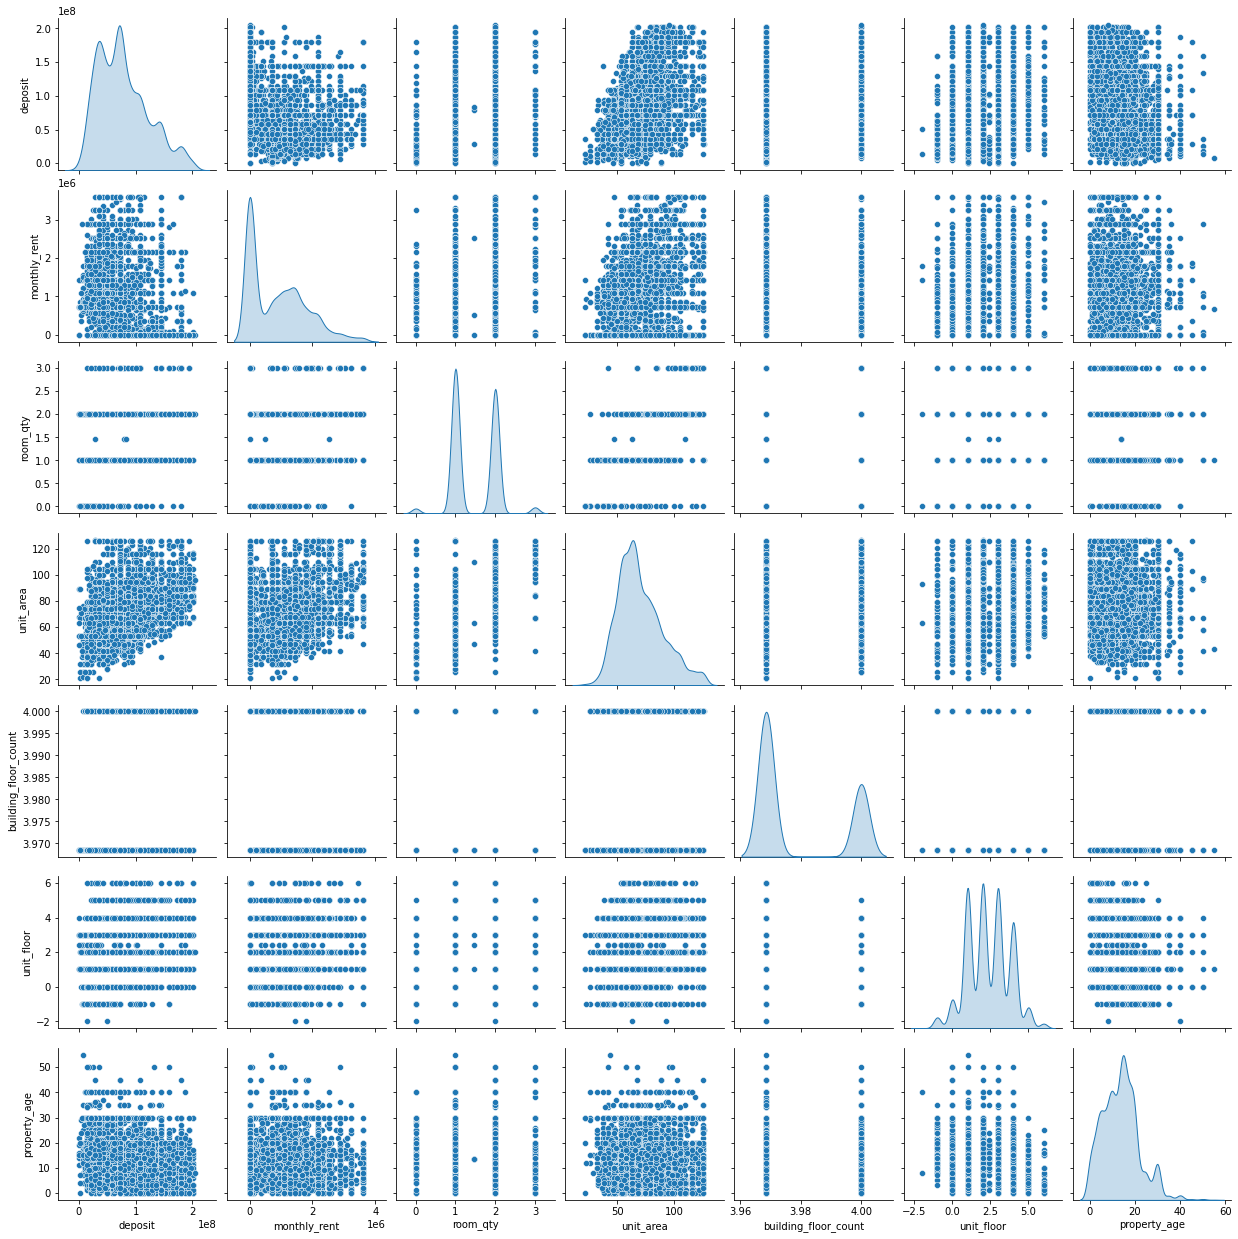

In [ ]:
numerics = ['int64', 'float64']
dataset = df.select_dtypes(include=numerics)
plt.figure(figsize=(14, 14))
sns.pairplot(dataset, diag_kind='kde')

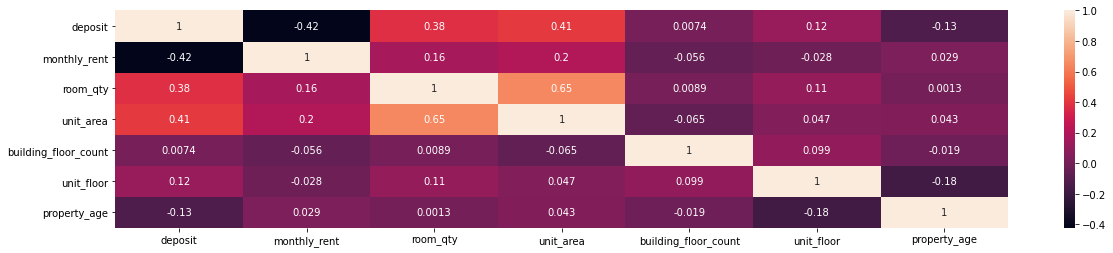

In [ ]:
plt.figure(figsize=(20,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

There should be little or no multicollinearity between the features. If two features is highly correlated then there is no use in using both features. In that case, we can drop one feature. So heatmap gives us the correlation matrix there we can see which features are highly correlated. From above correlation matrix we can see that room_qty and unit_area are correlated. But, the correlation is around 0.6. Hence, we will not drop these columns for building the model. But, a thorough analysis is also required after dropping these columns and accuracy should be compared. 

## Step 6: Data Preprocessing for Model Implementation

### 6.1 Standardize the dataset

Here, the data set contains numerical features that have been measured in different units, such as deposit and unit_area. The Clustering algorithm would consider deposit more important than unit_area only because the values for deposit are larger as compared to unit_area.

Clustering algorithm need to consider all features on an even playing field. That means the values for all features must be transformed to the same scale.

The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.

Here, we use the StandardScaler class. This class implements a type of feature scaling called standardization. Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1.

In [ ]:
df_orig = df.copy()
category = ['district_uuid', 'has_elevator', 'has_storage_area']
for c in category:
    le = LabelEncoder()
    df[c] =le.fit_transform(df[c].astype('str'))   
features = [c for c in df.columns if c not in ['item_id']]
del df['item_id']
rb = StandardScaler()
df = rb.fit_transform(df)
df = pd.DataFrame(df, columns=features)
df.head()

,district_uuid,has_elevator,has_storage_area,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age
0,-1.334,-0.719,0.727,-0.298,-0.976,-0.822,-1.425,-0.708,-1.715,1.167
1,0.203,1.350,0.727,-0.136,-0.179,0.927,2.314,-0.708,-0.982,0.301
2,0.497,-0.719,0.727,-0.620,0.618,-0.822,0.192,-0.708,-1.715,0.672
3,0.158,1.350,-1.352,-0.943,-0.019,-0.822,-0.515,-0.708,-0.249,-0.937
4,-0.430,1.350,0.727,-1.105,0.459,-0.822,-1.273,-0.708,-0.982,-1.184


In [ ]:
df.describe()

,district_uuid,has_elevator,has_storage_area,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age
count,4916.000,4916.000,4916.000,4916.000,4916.000,4916.000,4916.000,4916.000,4916.000,4916.000
mean,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.102,-2.788,-3.430,-1.750,-0.976,-2.570,-2.486,-0.708,-3.182,-1.679
25%,-0.927,-0.719,-1.352,-0.782,-0.976,-0.822,-0.768,-0.708,-0.982,-0.689
50%,0.180,-0.719,0.727,-0.136,-0.179,-0.822,-0.162,-0.708,-0.249,0.053
75%,0.881,1.350,0.727,0.671,0.618,0.927,0.596,1.413,0.485,0.548
max,1.468,1.350,0.727,2.850,3.009,2.675,2.869,1.413,2.685,5.127


## Step 7: Model Design Tuning and Testing

### 7.1 Apply K-means on the scaled data. Try it with multiple K values ( K = 1 to 15) and plot a elbow plot between inertia and K value.

Now the data are ready to be clustered. The KMeans estimator class in scikit-learn is where you set the algorithm parameters before fitting the estimator to the data. The scikit-learn implementation is flexible, providing several parameters that can be tuned.

In [ ]:
from sklearn.cluster import KMeans
#This will perform ten runs of the k-means algorithm on your data with a maximum of 300 iterations per run
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300)  
kmeans.fit(df)

KMeans(init='random', n_clusters=3)

Here, 
init controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random".

n_clusters sets k for the clustering step. This is the most important parameter for k-means.

n_init sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

max_iter sets the number of maximum iterations for each initialization of the k-means algorithm.

In [ ]:
# The lowest SSE value
kmeans.inertia_

37103.69216633855

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.07003303, -0.686418  , -0.00348529,  0.27700359,  0.09807948,
         0.96965924,  0.70443264,  0.20159861, -0.0231624 ,  0.54010772],
       [ 0.03593398,  1.34618279,  0.25082708,  0.40023252,  0.09391915,
         0.17708125,  0.22032956, -0.24073039,  0.31160063, -0.79962307],
       [ 0.02139807, -0.62964374, -0.20923742, -0.54263832, -0.151775  ,
        -0.865954  , -0.70651702,  0.05433846, -0.2460199 ,  0.27619696]])

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

17

In [ ]:
#Finally, the cluster assignments are stored as a one-dimensional NumPy array in kmeans.labels_.     
labels = kmeans.labels_
print("LABLES")
print(labels)

LABLES
[2 1 2 ... 2 0 1]


In [ ]:
#Assigning cluster to the dataset
df_orig['Cluster'] = list(pd.Series(labels))
df_orig.head()

,item_id,district_uuid,has_elevator,has_storage_area,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age,Cluster
0,91c0e569-bddd-4128-9720-2550bb85580e,263682f6-d0cd-4569-aeec-e727b76b7665,False,True,64800000.000,0.000,1.000,42.000,3.969,0.000,23.000,2
1,b00b7919-06be-4d26-98b8-1971787e1d46,97c9535e-3985-47ce-a84c-a962c838a76b,True,True,72000000.000,720000.000,2.000,116.000,3.969,1.000,16.000,1
2,9eddb6bc-e424-4774-b55f-bfd54366d627,b790f536-c274-4147-86e0-94d9b6d7352d,False,True,50400000.000,1440000.000,1.000,74.000,3.969,0.000,19.000,2
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,93d06676-4975-4cc5-919b-3a0c29c7ad43,True,False,36000000.000,864000.000,1.000,60.000,3.969,2.000,6.000,1
4,929eb20c-3694-46b2-b96c-91117b995d1b,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,True,True,28800000.000,1296000.000,1.000,45.000,3.969,1.000,4.000,1


In [ ]:
#Cluster Count
cluster_count = df_orig.groupby('Cluster')['item_id'].count()
cluster_count

Cluster
0    1407
1    1607
2    1902
Name: item_id, dtype: int64

Next step is to choose the appropriate number of Clusters
There are two methods that are commonly used to evaluate the appropriate number of clusters:

1. The elbow method
2. The silhouette coefficient

These are often used as complementary evaluation techniques rather than one being preferred over the other. To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE.

In [ ]:
kmeans_a = { "init": "random", "n_init": 10, "max_iter": 300, "random_state": 42 }

sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_a)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

Let's plot SSE as a function of the number of clusters. 
Notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.

There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters.

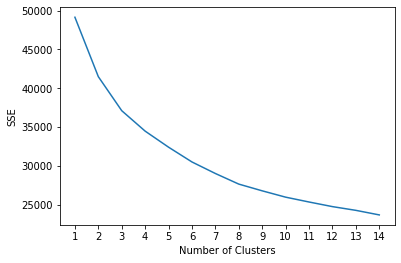

In [ ]:
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Here, the elbow is located at x=5.

Determining the elbow point in the SSE curve isn’t always straightforward. If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, kneed, to identify the elbow point programmatically.

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 15), sse, curve="convex", direction="decreasing")
kl.elbow

5

### 7.2 Check the silhouette_score for K = 2,3,4,and 5

The silhouette coefficient quantifies how well a data point fits into its assigned cluster based on two factors:

1. How close the data point is to other points in the cluster
2. How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

Now, we will Loop through values of k again. This time, instead of computing SSE, we compute the silhouette coefficient.

In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice we start at 2 clusters for silhouette coefficient
for k in range(3, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_a)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)
print(silhouette_coefficients)

[0.14829639042815002, 0.13620195566312412, 0.13808367013141898, 0.141990502818464]


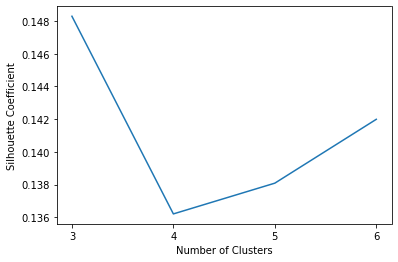

In [ ]:
#Plotting the average silhouette scores for each k.

plt.plot(range(3, 7), silhouette_coefficients)
plt.xticks(range(3, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

This shows that the best choice for k is 3 since it has the maximum score.

Further Study:

Which method is better: Silhouette Method or Elbow Method to find Optimal Clusters?

https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891

### 7.3 Report the optimal K value and fit the data clustering model using it. 

<AxesSubplot:title={'center':'KMeans Result'}, xlabel='x1', ylabel='x2'>

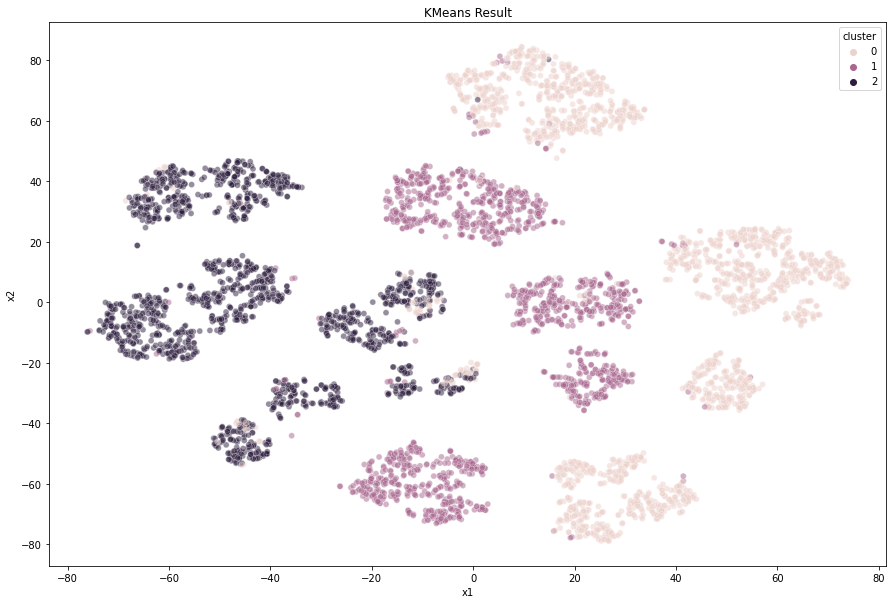

In [ ]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300 )
kmeans.fit(df)
labels = kmeans.labels_
df_orig['Cluster'] = list(pd.Series(labels))
df_orig.head()
from sklearn.manifold import TSNE
X = df.copy()
Xtsne = TSNE(n_components=2).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = kmeans.labels_
dftsne.columns = ['x1','x2','cluster']
plt.figure(figsize=(15,10))
plt.title('KMeans Result')
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5)

### 7.4 add cluster label to the final dataset (before scaling) for cluster profliling

In [ ]:
df_orig['Cluster'] = list(pd.Series(labels))
df_orig.head()

,item_id,district_uuid,has_elevator,has_storage_area,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age,Cluster
0,91c0e569-bddd-4128-9720-2550bb85580e,263682f6-d0cd-4569-aeec-e727b76b7665,False,True,64800000.000,0.000,1.000,42.000,3.969,0.000,23.000,0
1,b00b7919-06be-4d26-98b8-1971787e1d46,97c9535e-3985-47ce-a84c-a962c838a76b,True,True,72000000.000,720000.000,2.000,116.000,3.969,1.000,16.000,2
2,9eddb6bc-e424-4774-b55f-bfd54366d627,b790f536-c274-4147-86e0-94d9b6d7352d,False,True,50400000.000,1440000.000,1.000,74.000,3.969,0.000,19.000,0
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,93d06676-4975-4cc5-919b-3a0c29c7ad43,True,False,36000000.000,864000.000,1.000,60.000,3.969,2.000,6.000,2
4,929eb20c-3694-46b2-b96c-91117b995d1b,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,True,True,28800000.000,1296000.000,1.000,45.000,3.969,1.000,4.000,2


In [ ]:
df_orig.to_csv('D:/Docs/GreatLearning/Clustering/property_clustering_output.csv', index=False)

## Step 8: Cluster Profiling

Check crosstab between cluster label and other features and comment on the result

In [ ]:
room_qty_c = pd.crosstab(df_orig['room_qty'], df_orig['Cluster'])
room_qty_c

Cluster,0,1,2
room_qty,,,
0.000,79,1,6
1.000,1792,37,709
1.473,2,1,0
2.000,28,1295,860
3.000,0,74,32


Inferences:

If the propoerty has room_qty = 1, then it is falling inside 1st Cluster.

If the propoerty has room_qty = 2, then it is falling inside 2nd Cluster.

In [ ]:
property_age_c = pd.crosstab(df_orig['property_age'], df_orig['Cluster'])
property_age_c

Cluster,0,1,2
property_age,,,
0.000,4,5,158
1.000,8,5,76
2.000,16,3,78
3.000,18,6,110
4.000,39,4,165
5.000,33,19,147
6.000,34,9,97
7.000,45,17,113
8.000,50,23,83


Inferences:
    
Property of age between 14 to 30 years (older propoerties) are clustered into 1st cluster.

Property of age between 1 to 10 years (new propoerties) are clustered into 2nd cluster.

In [ ]:
unit_floor_c = pd.crosstab(df_orig['unit_floor'], df_orig['Cluster'])
unit_floor_c

Cluster,0,1,2
unit_floor,,,
-2.000,1,1,0
-1.000,64,24,1
0.000,136,80,20
1.000,508,299,344
2.000,473,335,370
2.417,23,5,8
3.000,421,370,355
4.000,272,289,308
5.000,3,4,164


Inferences:

Property with less number of floors(basement or 1 - 2 floors) are clustered into 1st cluster.

Property with high number of floors are clustered into 2nd cluster.

## Step 9: Model pickling and Model Deployment (Web or UI)

Pickle is the standard way of serializing objects in Python.

You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file.

Later you can load this file to deserialize your model and use it to make new predictions.

In [ ]:
import pickle
pickle.dump(kmeans, open('D:/Docs/GreatLearning/Clustering/kmeans_model.pkl','wb'))

kmeans_model is the file name. 

pickle module uses binary protocol and as a result, the file mode should also be in write and binary format.

In [ ]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 400, height = 300,  relief = 'raised')
canvas1.pack()

label1 = tk.Label(root, text='k-Means Clustering')
label1.config(font=('helvetica', 14))
canvas1.create_window(200, 25, window=label1)

label2 = tk.Label(root, text='Type Number of Clusters:')
label2.config(font=('helvetica', 8))
canvas1.create_window(200, 120, window=label2)

entry1 = tk.Entry (root) 
canvas1.create_window(200, 140, window=entry1)

def getExcel ():
    
    global df
    import_file_path = filedialog.askopenfilename()
    read_file = pd.read_csv("D:/Docs/GreatLearning/Clustering/property_clustering_output.csv")
    df = DataFrame(read_file,columns=['deposit','monthly_rent', 'room_qty', 'unit_area', 'property_age'])  
    
browseButtonExcel = tk.Button(text=" Import Excel File ", command=getExcel, bg='green', fg='white', font=('helvetica', 10, 'bold'))
canvas1.create_window(200, 70, window=browseButtonExcel)

def getKMeans ():
    global df
    global numberOfClusters
    numberOfClusters = int(entry1.get())
    
    kmeans = KMeans(n_clusters=numberOfClusters).fit(df)
    centroids = kmeans.cluster_centers_
    
    label3 = tk.Label(root, text= centroids)
    canvas1.create_window(200, 250, window=label3)
    
    figure1 = plt.Figure(figsize=(4,3), dpi=100)
    ax1 = figure1.add_subplot(111)
    ax1.scatter(df['deposit'], df['monthly_rent'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    ax1.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    scatter1 = FigureCanvasTkAgg(figure1, root) 
    scatter1.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
    
processButton = tk.Button(text=' Process k-Means ', command=getKMeans, bg='brown', fg='white', font=('helvetica', 10, 'bold'))
canvas1.create_window(200, 170, window=processButton)

root.mainloop()

## Step 10: Conclusion

1. We imported data using Pandas module. Next, we clean the data by imputing missing values. 

2. In deposit, monthly_rent and unit_area, outliers were present. But, it is possible that there could be some properties with very high monthly rent or with high montly rent. In this analysis we considered these values as outliers but a seperate analysis is also required where these values should be kept as it is while bulilding the model.

3. Correlation matrix shows that room_qty and unit_area are somehow correlated, but, the correlation is around 0.6. Hence, we will not drop these columns for building the model. But, a thorough analysis is also required after dropping these columns.

4. As, this data is measured in different units, we standerdise the dataset before buliding the Clustering model. 

5. Next we run the clustering algortihm for different values of k and found that k=5 is the optimal value using the elblow method. After checking the silhouette_score, we found that k=3 is the optimal value. 

6. We prefer the silhouette_score for choosing the optimal vlaue of k as the silhouette value measures how similar an object is to its own cluster compared to other clusters. 

7. We pickle the best model, so that we can simple load that model for future data.